<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week12_Bayes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Posteriors II

In the last video, we introduced the concept of Bayes' theorem, posterior distributions for unkown parameters, and applied to the case of the Binomial Distribution (coin flipping).

Here we will continue the discussion with some examples.  Along the way, we will explain two methods for coomputing posterior distributions.

1. Conjguate Priors
2. Numerical integration

### Example:  Normal Distribution with known variance and unkown mean.



We suppose that $X \sim \mathcal{N}(\mu, \sigma^2)$ but we don't know $\mu$. We do however have a prior distribution for $\mu$. We Will take $\mu \sim \mathcal{N}(\eta, \xi^2)$

If $\xi$ is large, we are saying we don't really know much about $\mu$, whereas if $\xi$ is small, we are claiming strong prior knowledge of $\mu$.



To simplify things, let's take $\sigma = 1$ and $\eta = 0$ (for this example).


We observe $X$ $N$ times.  Then

$$L(x_1,x_2,...,x_N|\mu) = \phi(x_1 - \mu)\cdot \phi(x_2 - \mu)\cdots \phi(x_N-\mu)$$

and 

$$g_{\mu}(\mu) =  \frac{1}{\xi}\phi\left(\frac{\mu}{\xi}   \right)$$

where 

$\phi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$


Hence the posterior is 

$$g_{\mu}(\mu|(x_1,x_2,...,x_N))=\frac{\phi(x_1 - \mu)\cdot \phi(x_2 - \mu)\cdots \phi(x_N-\mu)\frac{1}{\xi}\phi\left(\frac{\mu}{\xi}   \right)}{\int_{-\infty}^{\infty}\phi(x_1 - \mu)\cdot \phi(x_2 - \mu)\cdots \phi(x_N-\mu)\frac{1}{\xi}\phi\left(\frac{\mu}{\xi}   \right)d\mu} $$


We focus on the numerator (recalling that the denominator just makes things integrate to $1$ as it is not a function of $\mu$.


$$\phi(x_1 - \mu)\cdot \phi(x_2 - \mu)\cdots \phi(x_N-\mu)\frac{1}{\xi}\phi\left(\frac{\mu}{\xi}   \right)\\
=\left(\frac{1}{\sqrt{2\pi}} \right)^Ne^{-\frac{1}{2}\sum_{k=1}^N (x_k- \mu)^2}\frac{1}{\xi\sqrt{2\pi}}e^{-\frac{\mu^2}{2\xi^2}}\\
\propto e^{  -\frac{1}{2}\sum_{k=1}^N (x_k- \mu)^2 - \frac{\mu^2}{2\xi^2}        }$$



We focus on the exonent since that is the only place the variable $\mu$ appears.  It is:

$$-\frac{1}{2}\sum_{k=1}^N (x_k- \mu)^2 - \frac{\mu^2}{2\xi^2}\\
-\frac{1}{2}\left( \mu^2 \left(N + \frac{1}{\xi^2} \right)  - 2\mu\left(\sum_{k=1}^N x_k  \right) + \mathrm{nonmustuff}        \right)  $$


We let $$\frac{1}{\tilde{\xi}^2} =N + \frac{1}{\xi^2} $$  


which mean that we can write he exponent as

$$-\frac{1}{2} \frac{(\mu - \tilde{\eta})^2}{\tilde{\xi}^2}+ \mathrm{nonmustuff}$$

where

$$\tilde{\eta} = \tilde{\xi}^2 N \bar{x}$$


The basic result is therefore that the posterior is Gaussian with mean $\tilde{\eta}$ and Standard Deviation $\tilde{\xi}$


That is to say, this is another example of conjugate prior, where the posterior is the same kind of distribution as the the priot, but with updated parameters. 



Historically, using conjugate priors was a key part of Bayesian analysis since it removed the need to evaluate difficult integrals. You just needed to know the rule for updating the parameters of the prior.

However, if the prior is not a conjugate prior, it is still often feasable to perform numerical integration to obtain the poterior function.


### Example


We will use the Gaussian example above with $\xi = 3$.  We will then generate 10 data points from the "true" distribution which has $\mu = 2$. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.integrate import quad



In [ ]:
mu_true = 2
N = 10

xi = 3


data = ss.norm.rvs(loc = mu_true, size = N)

g0 = lambda m: ss.norm.pdf(m, scale = xi)


Before we do anything Bayesian, let's just take a look at what we do know.

### The prior for $\mu$

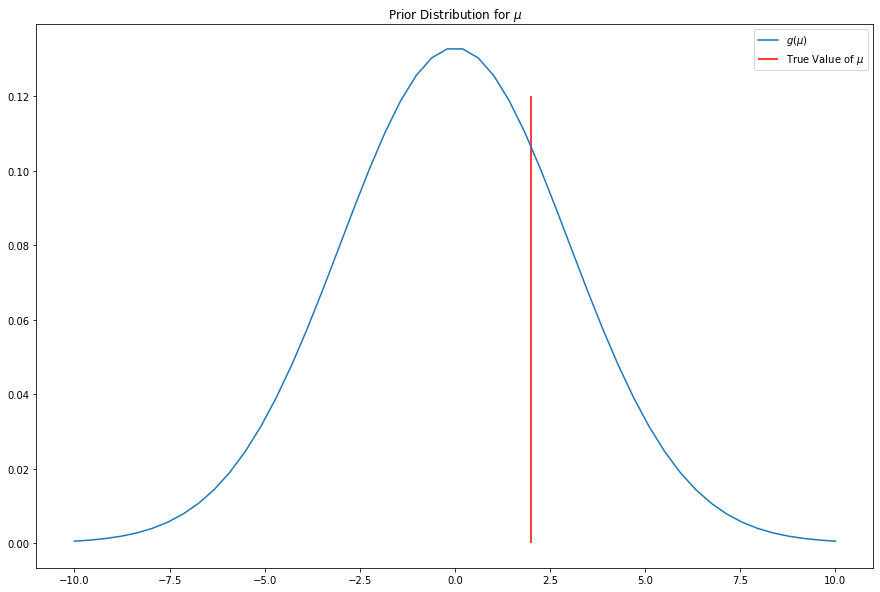

In [ ]:
m = np.linspace(-10,10)
plt.figure(figsize= (15,10))

plt.plot(m, g0(m), label="$g(\\mu)$")

plt.vlines(x=2, ymin = 0, ymax = .12, color ='r', label ="True Value of $\\mu$")

plt.legend()

plt.title("Prior Distribution for $\mu$")

plt.show()

### Histogram of Data

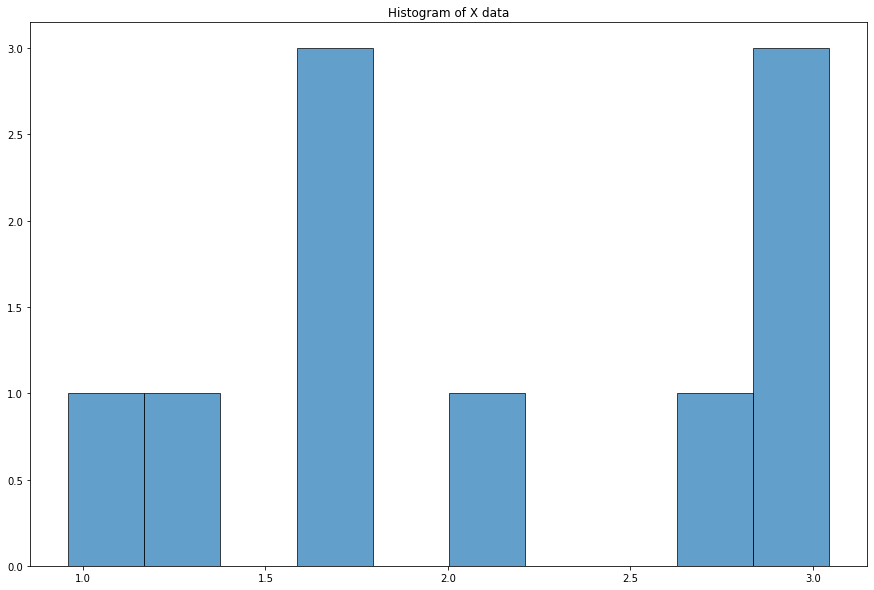

In [ ]:
plt.figure(figsize= (15,10))

plt.hist(data,  edgecolor = 'Black', alpha =.7)

plt.title("Histogram of X data")

plt.show()

Note also the sample mean. 

In [ ]:
data.mean()

2.1217469321368423

Now let's calculate the posterior.


In [ ]:

def ll_num(m, data, g):
    
    f = lambda x,m: ss.norm.pdf(x, loc = m).prod()
    return f(data, m)*g(m)
  

We make the numerator a function of the mean parameter.

In [ ]:
gp_num = lambda m: ll_num(m,data, g0)

We vectorize it so that we can integrate.

In [ ]:
gp_num_v = np.vectorize(gp_num)

Here we make the posterior integrate to 1.

In [ ]:
gp_den = quad(gp_num_v, -np.inf, np.inf)[0]


gp = lambda m: gp_num_v(m)/gp_den
  
    

In [ ]:
# Just checking

quad(gp, -np.inf, np.inf)[0]

1.000000023077264

Now let's plot our posterior.

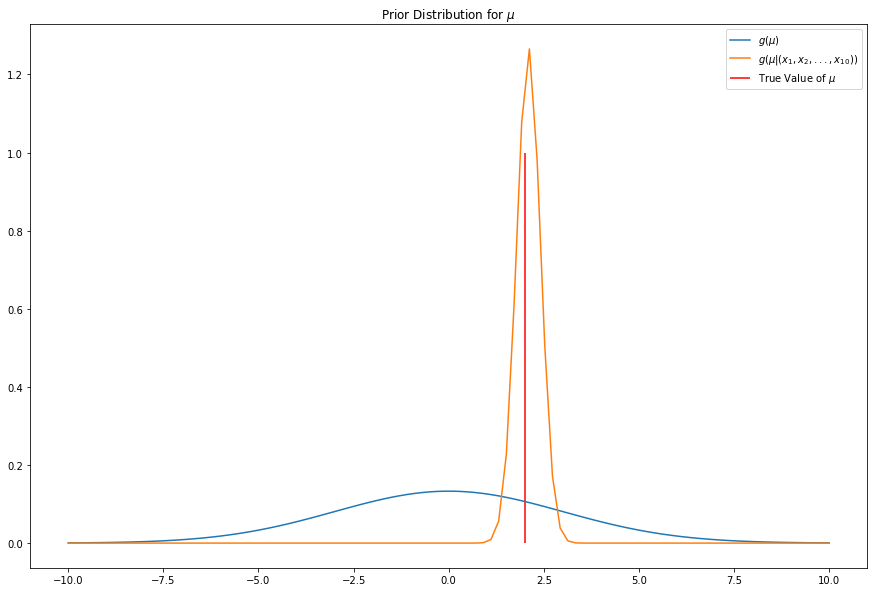

In [ ]:
m = np.linspace(-10,10,100)
plt.figure(figsize= (15,10))

plt.plot(m, g0(m), label="$g(\\mu)$")

plt.vlines(x=2, ymin = 0, ymax = 1, color ='r', label ="True Value of $\\mu$")

plt.plot(m, gp(m), label="$g(\\mu|(x_1,x_2,...,x_{10}))$")


plt.legend()

plt.title("Prior Distribution for $\mu$")

plt.show()

Let's compare this with our calculated posterior using the fact the we are working with a conjugate prior.

Recall that 
$$\frac{1}{\tilde{\xi}^2} =N + \frac{1}{\xi^2} $$ 

which is the same as


$$\tilde{\xi} = \sqrt{\frac{1}{N + \frac{1}{\xi^2}}}$$



In [ ]:
xi_tilde = np.sqrt(1/(N + 1/xi**2) )


xi_tilde

0.3144854510165755

And that 

$$\tilde{\eta} = \tilde{\xi} N \bar{x}$$

In [ ]:
eta_tilde = xi_tilde**2*N*data.mean()
eta_tilde

2.09843103178369

Let's add this to our plot.

Text(0.5, 1.0, 'Prior Distribution for $\\mu$')

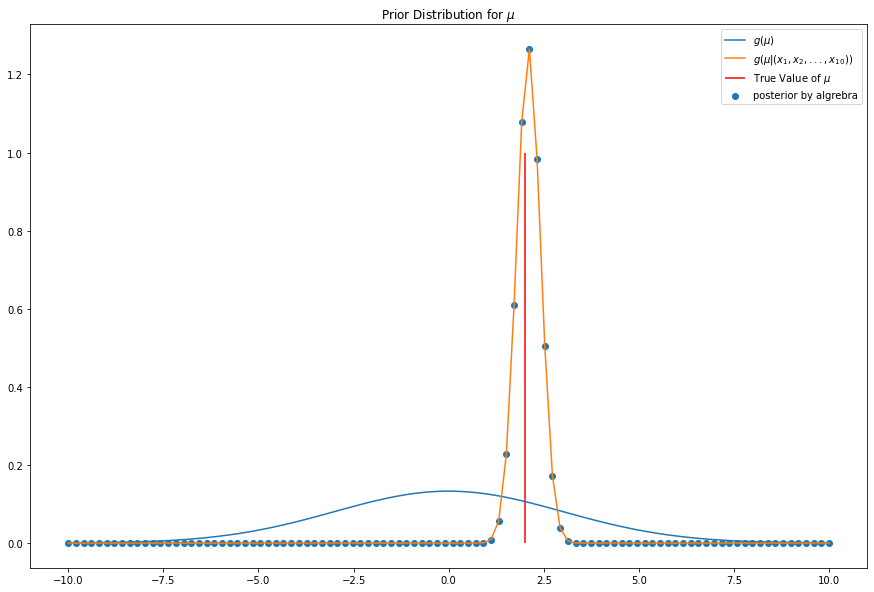

In [ ]:
m = np.linspace(-10,10,100)
plt.figure(figsize= (15,10))

plt.plot(m, g0(m), label="$g(\\mu)$")

plt.vlines(x=2, ymin = 0, ymax = 1, color ='r', label ="True Value of $\\mu$")

plt.plot(m, gp(m), label="$g(\\mu|(x_1,x_2,...,x_{10}))$")

plt.scatter(m, ss.norm.pdf(m, loc = eta_tilde, scale = xi_tilde), label = "posterior by algrebra")


plt.legend()

plt.title("Prior Distribution for $\mu$")


### Comments


* The numerical integration (in theory) works even if we do not have a conjugate prior. However, it can numerically tricky for larger sample sizes (see below) because we end up multiplying a bunch of numbers less than one.

* We aren't always blessed with a conjugate prior.


The result of this is that, without another way to tackle this, the Baysian posterior is of limited usefullness.  Fortunately, there is another way:  Markov Chain Monte Carlo.





To illustate the point about larger data sets, we repeat the above but increase the sample size to 1000.

In [ ]:
mu_true = 2
N = 1000

xi = 3


data = ss.norm.rvs(loc = mu_true, size = N)

g0 = lambda m: ss.norm.pdf(m, scale = xi)


def ll_num(m, data, g):
    
    f = lambda x,m: ss.norm.pdf(x, loc = m).prod()
    return f(data, m)*g(m)

gp_num = lambda m: ll_num(m,data, g0)

gp_num_v = np.vectorize(gp_num)


gp_den = quad(gp_num_v, -np.inf, np.inf)[0]


gp = lambda m: gp_num_v(m)/gp_den


quad(gp, -np.inf, np.inf)[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


nan

In [ ]:
gp_den

0.0